# Определение перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

*Описание тарифов*

<b>Тариф «Смарт»</b>

Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

<b>Тариф «Ультра»</b>

Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

<h1>Содержание<span class="tocSkip"></span></h1>

- [Открытие данных](#start)
- [Предобработка данных](#preprocessing)
- [Анализ данных](#analysis)
- [Проверка гипотезы "средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"](#Hypothesis_testing_1)
- [Проверка гипотезы "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов""](#Hypothesis_testing_2)
- [Общий вывод](#conclusion)

## Открытие данных<a id='start'></a>

Вызовем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
pd.set_option('display.float_format', '{:,.2f}'.format)

### файл с таблицей calls звонки

Откроем и выведем первые строки таблицы /datasets/calls.csv.методом head():

In [2]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Это таблица со звонками (id - код звонка, call_date - дата звонка, duration - длительность звонка, user_id - id абонента).

Познакомимся с таблиценй с помощью функции describe().T

In [3]:
data_calls.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


Всего в таблице 202607 строк.

### файл с таблицей internet интернет

Откроем и выведем первые строки таблицы /datasets/internet.csv методом head():

In [4]:
data_internet = pd.read_csv('/datasets/internet.csv')
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Это таблица с данными интернет трафика (id - код подключения к интернету, mb_used - использованные Мб, session_date - дата подключения к интернету, user_id - id абонента).

Познакомимся с таблиценй с помощью функции describe().T

In [5]:
data_internet.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.0,74697.500000,43127.054745,0.0,37348.7500,74697.500,112046.2500,149395.00
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


В таблице 149396 строк, что меньше чем в таблице со звонками, но тот же диапазон id абонентов.

### файл с таблицей messages сообщения

Откроем и выведем первые строки таблицы /datasets/messages.csv методом head():

In [6]:
data_messages = pd.read_csv('/datasets/messages.csv')
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Это таблица с данными сообщений (id - код сообщения, message_date - дата отправки сообщения, user_id - id абонента).

Познакомимся с таблиценй с помощью функции describe().T

In [7]:
data_messages.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


В таблице 123036 строк.

### файл с таблицей tariffs тарифы

Откроем и выведем первые строки таблицы /datasets/tariffs.csv. методом head():

In [8]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице ошибок нет.

Это таблица с данными о тарифных планах (messages_included - включено сообщений, mb_per_month_included - включено трафика, minutes_included - включено минут, rub_monthly_fee - ежемесячная плата в рублях, rub_per_gb - цена 1 Гб сверхтарифного интернет трафика в рублях, rub_per_message - цена одного сообщения сверх включенных в тариф в рублях, rub_per_minute - цена одной минуты разговора сверх включенных в тариф в рублях, tariff_name - название тарифа).

В таблице всего 2 строки с описанием тарифных планов.

### файл с таблицей users пользователи

Откроем и выведем первые строки таблицы /datasets/users.csv методом head():

In [9]:
data_users = pd.read_csv('/datasets/users.csv')
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [10]:
data_users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


### Вывод 
Имеется 5 таблиц - таблица users (информация о пользователях), таблица calls (информация о звонках), таблица messages (информация о сообщениях), таблица internet (информация об интернет-сессиях), таблица tariffs (информация о тарифах).


## Предобработка данных  <a id='preprocessing'></a>

### предобработка таблицы пользователей data_users

Обработаем пропуски, исправим типы данных в таблице, проверим на дубликаты и другие ошибки.

#### работа с пропусками

Проверим пропуски в таблице пользователей data_users

In [11]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Пропуски есть только в колонке churn_date прекращение пользование тарифом, вероятно потому что пользователи до сих пор на этом тарифном плане. Пока оставим их.

#### Работа с типами данных

Заменим в колонках churn_date и reg_date тип данных object на datetime.

In [12]:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

Заменим в колонке user_id тип данных int64, заменим на int16.

In [13]:
data_users['user_id'] = data_users['user_id'].astype('int16')

Заменим в колонке age тип данных int64, заменим на int8.

In [14]:
data_users['age'] = data_users['age'].astype('int8')

#### Работа с дубликатами

Проверим явные дубликаты в таблице.

In [15]:
data_users.duplicated().sum()

0

Явных дубликатов в таблице нет.

#### Проверим на ошибки

In [16]:
data_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [17]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


В таблице нет явных ошибок.

**Вывод**

В таблице данные пользователей заменили тип данных на дату в столбцах churn_date и reg_date. Заменили типы целочисленных значений в колонках age и user_id на int16 и int8 для уменьшения размера датасета и ускорения обработки данных.

### предобработка таблицы calls звонки

#### работа с пропусками

In [18]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропусков в таблице нет.

#### Работа с типами данных

Заменим в колонке call_date тип данных object на datetime.

In [19]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

Заменим в колонке user_id тип данных int64, заменим на int16.

In [20]:
data_calls['user_id'] = data_calls['user_id'].astype('int16')

Заменим в колонке duration тип данных float64, заменим на float16.

#### Проверим на ошибки

In [21]:
data_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [22]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Время в столбце duration указаны дробные значения в минутах (2.849609, 13.796875), округлим до целых значений в большую сторону так как мегалайн всегда округляет секунды до минут в большую сторону. И заменим тип полученных данных на int8 для уменьшения размера таблицы.

In [23]:
data_calls['duration'] = np.ceil(data_calls['duration']).astype('int8')

**Вывод**

В таблице calls звонки заменили тип данных на дату в столбце call_date. Заменили типы целочисленных значений в колонках user_id и  duration на int16 и int8 для уменьшения размера датасета и ускорения обработки данных.
Округлили данные в большую сторону так как мегалайн всегда округляет секунды до минут в большую сторону.

### предобработка таблицы internet интернет

#### работа с пропусками

In [24]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Пропусков в таблице нет.

#### Работа с типами данных

Заменим в колонке user_id тип данных int64, заменим на int16.

In [25]:
data_internet['user_id'] = data_internet['user_id'].astype('int16')

Заменим в колонке session_date тип данных object на datetime.

In [26]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

#### Проверим на ошибки

In [27]:
data_internet.describe() 

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [28]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


В таблице есть лишняя колонка Unnamed: 0 она отражает индексы строк. Удалим её.

In [29]:
data_internet = data_internet.drop('Unnamed: 0', 1)

**Вывод**

В таблице internet интернет заменили тип данных на дату в столбце session_date. Заменили типы целочисленных значений в колонке user_id на int16 для уменьшения размера датасета и ускорения обработки данных.
Удалили лишний столбец Unnamed: 0.

### предобработка таблицы таблицей messages сообщения

#### работа с пропусками

In [30]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Пропусков в таблице нет.

#### Работа с типами данных

Заменим в колонке user_id тип данных int64, заменим на int16.

In [31]:
data_messages['user_id'] = data_messages['user_id'].astype('int16')

Заменим в колонке message_date тип данных object на datetime.

In [32]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

In [33]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int16
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 2.1+ MB


#### Проверим на ошибки

In [34]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


В таблице нет явных ошибок.

**Вывод**

В таблице messages сообщения заменили тип данных на дату в столбце data_messages. Заменили типы целочисленных значений в колонке user_id на int16 для уменьшения размера датасета и ускорения обработки данных.

### Подготовим данные для дальнейшей работы.

Посчитаем для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

#### Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам.

Сделаем колонку с месяцем звонков:

In [35]:
data_calls['month'] = data_calls['call_date'].dt.month_name()
display(data_calls)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,July
1,1000_1,2018-08-17,0,1000,August
2,1000_2,2018-06-11,3,1000,June
3,1000_3,2018-09-21,14,1000,September
4,1000_4,2018-12-15,6,1000,December
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,December
202603,1499_216,2018-10-18,19,1499,October
202604,1499_217,2018-11-10,11,1499,November
202605,1499_218,2018-10-06,5,1499,October


Сделаем сводную таблицу c количеством израсходованных минут разговора по месяцам и сделанных звонков.

In [36]:
user_calls = data_calls.pivot_table(index= ['user_id', 'month'], values=['duration'], aggfunc=['sum', 'count'])
user_calls.columns = ['total_calls', 'count_calls']
user_calls.reset_index()
display(user_calls)

total_calls  count_calls
user_id month                              
1000    August           408.0           52
        December         333.0           46
        July             340.0           47
        June             172.0           43
        May              159.0           22
...                        ...          ...
1498    September        471.0           59
1499    December         492.0           69
        November         612.0           74
        October          449.0           68
        September         70.0            9

[3174 rows x 2 columns]

#### Посчитаем для каждого пользователя количество отправленных сообщений по месяцам.

In [37]:
data_messages['month'] = data_messages['message_date'].dt.month_name()
display(data_messages)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,June
1,1000_1,2018-10-08,1000,October
2,1000_2,2018-08-04,1000,August
3,1000_3,2018-06-16,1000,June
4,1000_4,2018-12-05,1000,December
...,...,...,...,...
123031,1499_179,2018-12-12,1499,December
123032,1499_180,2018-09-28,1499,September
123033,1499_181,2018-09-27,1499,September
123034,1499_182,2018-11-15,1499,November


In [38]:
user_messages = data_messages.pivot_table(index= ['user_id', 'month'], values='id', aggfunc=['count'])
user_messages.columns = ['count_messages']
user_messages.reset_index()
display(user_messages)

count_messages
user_id month                    
1000    August                 81
        December               70
        July                   75
        June                   60
        May                    22
...                           ...
1498    September              44
1499    December               66
        November               59
        October                48
        September              11

[2717 rows x 1 columns]

#### Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам.

In [39]:
data_internet['month'] = data_internet['session_date'].dt.month_name()
display(data_internet)

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,November
1,1000_1,1052.81,2018-09-07,1000,September
2,1000_2,1197.26,2018-06-25,1000,June
3,1000_3,550.27,2018-08-22,1000,August
4,1000_4,302.56,2018-09-24,1000,September
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,October
149392,1499_153,490.13,2018-12-14,1499,December
149393,1499_154,0.00,2018-10-27,1499,October
149394,1499_155,1246.32,2018-11-26,1499,November


In [40]:
user_internet = data_internet.pivot_table(index= ['user_id', 'month'], values='mb_used', aggfunc=['sum'])
user_internet.columns = ['traffic']
user_internet.reset_index()
display(user_internet)


traffic
user_id month              
1000    August     14055.93
        December    9817.61
        July       14003.64
        June       23233.77
        May         2253.49
...                     ...
1498    September  22134.41
1499    December   13055.58
        November   17963.31
        October    17788.51
        September   1845.75

[3203 rows x 1 columns]

Так как в компании мегалайн для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону, переведем общий помесячный трафик для пользователей в Гб и округлим в большую сторону.

In [41]:
user_internet['traffic'] = np.ceil(user_internet['traffic']/1024)
display(user_internet)

traffic
user_id month             
1000    August        14.0
        December      10.0
        July          14.0
        June          23.0
        May            3.0
...                    ...
1498    September     22.0
1499    December      13.0
        November      18.0
        October       18.0
        September      2.0

[3203 rows x 1 columns]

#### Сделаем общую таблицу по пользователям и потреблению тарифа.

Создадим общую таблицу по потреблению тарифа пользователями:

In [42]:
user_intake = user_calls.merge(user_messages, on= ['user_id', 'month'], how='left').merge(user_internet,  on= ['user_id', 'month'], how='left')
display(user_intake)

total_calls  count_calls  count_messages  traffic
user_id month                                                       
1000    August           408.0           52            81.0     14.0
        December         333.0           46            70.0     10.0
        July             340.0           47            75.0     14.0
        June             172.0           43            60.0     23.0
        May              159.0           22            22.0      3.0
...                        ...          ...             ...      ...
1498    September        471.0           59            44.0     22.0
1499    December         492.0           69            66.0     13.0
        November         612.0           74            59.0     18.0
        October          449.0           68            48.0     18.0
        September         70.0            9            11.0      2.0

[3174 rows x 4 columns]

Объединим таблицу по потреблению тарифа с информацией о пользователях:

In [43]:
data = data_users.merge(user_intake, on= ['user_id'], how='left', left_index = True)
data.reset_index()
display(data)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,total_calls,count_calls,count_messages,traffic
August,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,408.0,52.0,81.0,14.0
December,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,333.0,46.0,70.0,10.0
July,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,340.0,47.0,75.0,14.0
June,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,172.0,43.0,60.0,23.0
May,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,159.0,22.0,22.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
September,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,471.0,59.0,44.0,22.0
December,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,492.0,69.0,66.0,13.0
November,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,612.0,74.0,59.0,18.0
October,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,449.0,68.0,48.0,18.0


Удалим из таблицы данные которые мы не будем использовать age, churn_date, first_name, last_name, reg_date. 

In [44]:
data = data.drop('age', 1)

In [45]:
data = data.drop('churn_date', 1)

In [46]:
data = data.drop('first_name', 1)

In [47]:
data = data.drop('last_name', 1)

In [48]:
data = data.drop('reg_date', 1)

In [49]:
display(data)

,user_id,city,tariff,total_calls,count_calls,count_messages,traffic
August,1000,Краснодар,ultra,408.0,52.0,81.0,14.0
December,1000,Краснодар,ultra,333.0,46.0,70.0,10.0
July,1000,Краснодар,ultra,340.0,47.0,75.0,14.0
June,1000,Краснодар,ultra,172.0,43.0,60.0,23.0
May,1000,Краснодар,ultra,159.0,22.0,22.0,3.0
...,...,...,...,...,...,...,...
September,1498,Владикавказ,smart,471.0,59.0,44.0,22.0
December,1499,Пермь,smart,492.0,69.0,66.0,13.0
November,1499,Пермь,smart,612.0,74.0,59.0,18.0
October,1499,Пермь,smart,449.0,68.0,48.0,18.0


Добавим в таблицу информацию о тарифах.

Cначала сменим название колонки в таблице о тарифах, что бы потом объединить по ней.

In [50]:
data_tariffs = data_tariffs.rename(columns={'tariff_name':'tariff'})
print(data_tariffs)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff  
0              550         200                3               3  smart  
1             1950         150                1               1  ultra  


In [51]:
data_t = data.merge(data_tariffs, on='tariff', how='left')

In [52]:
display(data_t)

,user_id,city,tariff,total_calls,count_calls,count_messages,traffic,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,Краснодар,ultra,408.0,52.0,81.0,14.0,1000,30720,3000,1950,150,1,1
1,1000,Краснодар,ultra,333.0,46.0,70.0,10.0,1000,30720,3000,1950,150,1,1
2,1000,Краснодар,ultra,340.0,47.0,75.0,14.0,1000,30720,3000,1950,150,1,1
3,1000,Краснодар,ultra,172.0,43.0,60.0,23.0,1000,30720,3000,1950,150,1,1
4,1000,Краснодар,ultra,159.0,22.0,22.0,3.0,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,1498,Владикавказ,smart,471.0,59.0,44.0,22.0,50,15360,500,550,200,3,3
3178,1499,Пермь,smart,492.0,69.0,66.0,13.0,50,15360,500,550,200,3,3
3179,1499,Пермь,smart,612.0,74.0,59.0,18.0,50,15360,500,550,200,3,3
3180,1499,Пермь,smart,449.0,68.0,48.0,18.0,50,15360,500,550,200,3,3


#### Помесячную выручку с каждого пользователя

Проверим есть ли в нашей таблице пропуски

In [53]:
data_t.isna().sum()

user_id                    0
city                       0
tariff                     0
total_calls                8
count_calls                8
count_messages           504
traffic                   19
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

Заменим на 0 пропуски клиентам у которых не было потрачено минут, трафика или сообщений.

In [54]:
data_t['total_calls'] = data_t['total_calls'].fillna(0)
data_t['count_calls'] = data_t['count_calls'].fillna(0)
data_t['count_messages'] = data_t['count_messages'].fillna(0)
data_t['traffic'] = data_t['traffic'].fillna(0)
data_t.isna().sum()

user_id                  0
city                     0
tariff                   0
total_calls              0
count_calls              0
count_messages           0
traffic                  0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

Проверим нашу таблицу на дубликаты:

In [55]:
data_t.duplicated().sum()

0

In [56]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 3181
Data columns (total 14 columns):
user_id                  3182 non-null int16
city                     3182 non-null object
tariff                   3182 non-null object
total_calls              3182 non-null float64
count_calls              3182 non-null float64
count_messages           3182 non-null float64
traffic                  3182 non-null float64
messages_included        3182 non-null int64
mb_per_month_included    3182 non-null int64
minutes_included         3182 non-null int64
rub_monthly_fee          3182 non-null int64
rub_per_gb               3182 non-null int64
rub_per_message          3182 non-null int64
rub_per_minute           3182 non-null int64
dtypes: float64(4), int16(1), int64(7), object(2)
memory usage: 354.2+ KB


In [57]:
def above_the_tariff(row):
    sms = (row['count_messages'] - row['messages_included']) * row['rub_per_message']
    mins = (row['total_calls'] - row['minutes_included']) * row['rub_per_minute']
    mbs = (row['traffic'] - row['mb_per_month_included']/ 1024) * row['rub_per_gb'] 
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

In [58]:
data_t['above_the_tariff'] = data_t.apply(lambda x: above_the_tariff(x), axis=1)

In [59]:
data_t['total_paid'] = data_t['rub_monthly_fee'] + data_t['above_the_tariff']
display(data_t)

,user_id,city,tariff,total_calls,count_calls,count_messages,traffic,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
0,1000,Краснодар,ultra,408.0,52.0,81.0,14.0,1000,30720,3000,1950,150,1,1,0.0,1950.0
1,1000,Краснодар,ultra,333.0,46.0,70.0,10.0,1000,30720,3000,1950,150,1,1,0.0,1950.0
2,1000,Краснодар,ultra,340.0,47.0,75.0,14.0,1000,30720,3000,1950,150,1,1,0.0,1950.0
3,1000,Краснодар,ultra,172.0,43.0,60.0,23.0,1000,30720,3000,1950,150,1,1,0.0,1950.0
4,1000,Краснодар,ultra,159.0,22.0,22.0,3.0,1000,30720,3000,1950,150,1,1,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,1498,Владикавказ,smart,471.0,59.0,44.0,22.0,50,15360,500,550,200,3,3,1400.0,1950.0
3178,1499,Пермь,smart,492.0,69.0,66.0,13.0,50,15360,500,550,200,3,3,48.0,598.0
3179,1499,Пермь,smart,612.0,74.0,59.0,18.0,50,15360,500,550,200,3,3,963.0,1513.0
3180,1499,Пермь,smart,449.0,68.0,48.0,18.0,50,15360,500,550,200,3,3,600.0,1150.0


**Вывод**
Подготовили данные для дальнейшей работы. Посчитали для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам; помесячную выручку с каждого пользователя.


## Анализ данных <a id='analysis'></a>

Опишем поведение клиентов оператора, исходя из выборки.

Сделаем таблицу по доходности тарифных планов.

In [60]:
tariff_income = data_t
tariff_income = tariff_income.drop('user_id', 1)
tariff_income = tariff_income.drop('city', 1)
tariff_income = tariff_income.drop('total_calls', 1)
tariff_income = tariff_income.drop('count_calls', 1)
tariff_income = tariff_income.drop('count_messages', 1)
tariff_income = tariff_income.drop('traffic', 1)
tariff_income = tariff_income.drop('messages_included', 1)
tariff_income = tariff_income.drop('mb_per_month_included', 1)
tariff_income = tariff_income.drop('minutes_included', 1)
tariff_income = tariff_income.drop('rub_monthly_fee', 1)
tariff_income = tariff_income.drop('rub_per_gb', 1)
tariff_income = tariff_income.drop('rub_per_message', 1)
tariff_income = tariff_income.drop('rub_per_minute', 1)
display(tariff_income)

,tariff,above_the_tariff,total_paid
0,ultra,0.0,1950.0
1,ultra,0.0,1950.0
2,ultra,0.0,1950.0
3,ultra,0.0,1950.0
4,ultra,0.0,1950.0
...,...,...,...
3177,smart,1400.0,1950.0
3178,smart,48.0,598.0
3179,smart,963.0,1513.0
3180,smart,600.0,1150.0


In [61]:
tariff_income.groupby(['tariff']).describe()

above_the_tariff                                                   \
                  count        mean         std  min  25%    50%     75%   
tariff                                                                     
smart            2225.0  740.225169  819.052589  0.0  0.0  473.0  1200.0   
ultra             957.0  120.219436  378.351486  0.0  0.0    0.0     0.0   

               total_paid                                                   \
           max      count         mean         std     min     25%     50%   
tariff                                                                       
smart   6220.0     2225.0  1290.225169  819.052589   550.0   550.0  1023.0   
ultra   2850.0      957.0  2070.219436  378.351486  1950.0  1950.0  1950.0   

                        
           75%     max  
tariff                  
smart   1750.0  6770.0  
ultra   1950.0  4800.0

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe591da88d0>,
      dtype=object)

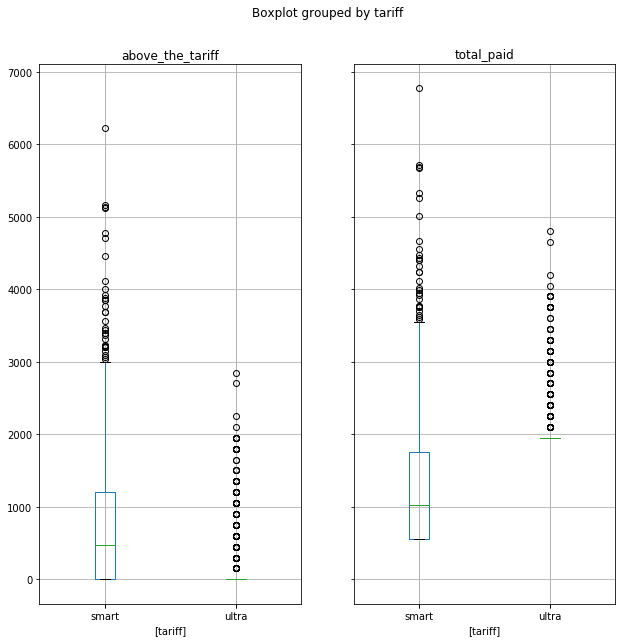

In [62]:
tariff_income.boxplot(by='tariff', figsize=(10,10))
# ax.set_ylim(0,7000);

Таким образом после первичной оценки доходности тарифов и поведения клиентов разных тарифов, можем отметить что пользователи тарифа ultra чаще всего не переплачивают за дополнительные услуги, в то время как дополнительная плата для клиентов тарифа smart достаточно распространенное явление. 

В среднем пользователи тарифа ultra суммарно тратят больше, чем пользователи тарифа smart.

###  Сколько минут разговора требуется пользователям каждого тарифа в месяц

In [63]:
data_t.groupby('tariff').agg({'total_calls':['median','mean','var','std']})

total_calls                                      
            median        mean           var         std
tariff                                                  
smart        422.0  418.686292  35969.739673  189.656900
ultra        525.0  542.031348  95467.737510  308.978539

In [64]:
data_t[data_t['tariff'] == 'smart']['total_calls'].describe()

count    2225.000000
mean      418.686292
std       189.656900
min         0.000000
25%       284.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: total_calls, dtype: float64

**Распределение звонков в минутах по тарифу смарт за месяц.**

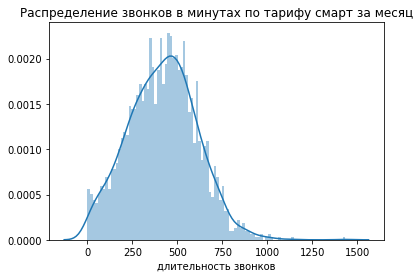

In [65]:
g_calls_smart = sns.distplot( a=data_t[data_t['tariff'] == 'smart']['total_calls'], hist=True, kde=True, bins = 100)
g_calls_smart.set_xlabel('длительность звонков')
g_calls_smart.set_title('Распределение звонков в минутах по тарифу смарт за месяц');

Распределение звонков в минутах по тарифу смарт за месяц напоминает нормальное. Более 50% клиентов укладываются во включенные 500 минут разговоров в месяц и более 25% клиентов берут минуты разговора сверх тарифного плана.

**Распределение звонков в минутах по тарифу ультра за месяц.**

In [66]:
data_t[data_t['tariff'] == 'ultra']['total_calls'].describe()

count     957.000000
mean      542.031348
std       308.978539
min         0.000000
25%       308.000000
50%       525.000000
75%       756.000000
max      1673.000000
Name: total_calls, dtype: float64

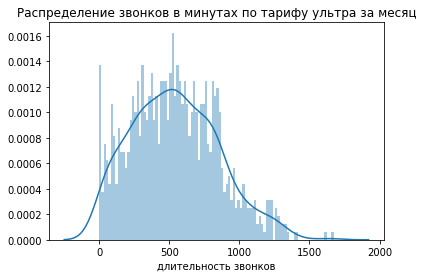

In [67]:
g_calls_ultra = sns.distplot( a=data_t[data_t['tariff'] == 'ultra']['total_calls'], hist=True, kde=True, bins = 100)
g_calls_ultra.set_xlabel('длительность звонков')
g_calls_ultra.set_title('Распределение звонков в минутах по тарифу ультра за месяц');

Распределение звонков в минутах по тарифу ультра за месяц так же напоминает нормальное. Однако в отличие от тарифа смарт обращает на себя внимание пик на суммарной длительности разговора 0 минут за месяц, некоторые клиенты вообще не звонят по телефону за месяц. В тариф ультра включено 3000 минут разговора, и такое количество не выговаривал ни один клиент ни в одном из месяцев (максимальная длительность разговора составила 1673 минуты, почти в 2 раза меньше включенных в тариф минут). Согласно правилу 3 сигм с вероятностью 99,7% максимальная длительность звоноков за месяц составит 1468,7 минут. Ни один клиент данного тарифа не воспользовался минутами разговора сверх тарифного плана.


**Вывод**
Более 25% клиентов тарифа смарт пользовались сверхтарифиными минутами разговора. 

Клиенты тарифа ультра не использовали сверхтарифные минут и с большой вероятностью разговаривают меньше чем на половину от заложенных в тарифный план минут в месяц. 

В среднем клиенты тарифа ультра разговаривали на 100 минут в месяц больше.

###   Сколько сообщений требуется пользователям каждого тарифа в месяц

In [68]:
data_t.groupby('tariff').agg({'count_messages':['median','mean','var','std']})

count_messages                                   
               median       mean          var        std
tariff                                                  
smart            28.0  33.366292   798.879709  28.264460
ultra            39.0  48.726228  2199.929154  46.903402

In [69]:
data_t[data_t['tariff'] == 'smart']['count_messages'].describe()

count    2225.000000
mean       33.366292
std        28.264460
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: count_messages, dtype: float64

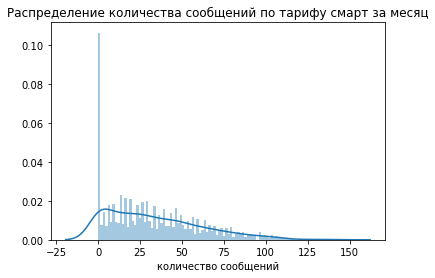

In [70]:
g_messages_smart = sns.distplot( a=data_t[data_t['tariff'] == 'smart']['count_messages'], hist=True, kde=True, bins = 100)
g_messages_smart.set_xlabel('количество сообщений')
g_messages_smart.set_title('Распределение количества сообщений по тарифу смарт за месяц');

Распределение количечества сообщений напоминает распределение Пуассона, с огромным скачком количества клиентов которые не отсылают сообщения. 
Практически 75% клиентов тарифа смарт укладываются в предусмотренные тарифом 50 сообщений и только оставшиеся 25% с небольшим процентов пользуются сообщениями сверх тарифа.

In [71]:
data_t[data_t['tariff'] == 'ultra']['count_messages'].describe()

count    957.000000
mean      48.726228
std       46.903402
min        0.000000
25%        5.000000
50%       39.000000
75%       79.000000
max      224.000000
Name: count_messages, dtype: float64

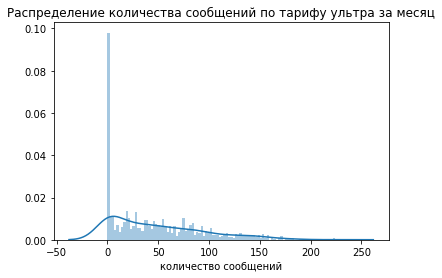

In [72]:
g_messages_ultra = sns.distplot( a=data_t[data_t['tariff'] == 'ultra']['count_messages'], hist=True, kde=True, bins = 100)
g_messages_ultra.set_xlabel('количество сообщений')
g_messages_ultra.set_title('Распределение количества сообщений по тарифу ультра за месяц');

Распределение напоминает распределение Пуассона с огромным пиком на 0 сообщений в месяц. 
Все клиенты тарифа ультра не пользовались дополнительными сообщениями.
75% клиентов отправляли не больше 79 сообщений. 

**Вывод**
У части клиентов тарифов ультра и смарт вообще не было сообщений за месяц.
75% клиентов тарифа смарт не пользуются дополнительными сообщениями.
Все клиенты тарифа ультра не пользуются дополнительными сообщениями.
В среднем количество сообщений тарифов смарт и ультра составило 33 и 48  сообщений (медиана не сильно отличалась от среднего 28 и 39), нужно отметить довольно большое стандартное отклонение и вариацию что проявлялось расширенным графиком частот количества сообщений.
Можно сказать что сообщения не пользуются особой популярностью у клиентов обоих тарифов, вероятно из-за того что общение в мессенджерах вытесняет общение по смс. 

###  Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

In [73]:
data_t.groupby('tariff').agg({'traffic':['median','mean','var','std']})

traffic                                
        median       mean        var       std
tariff                                        
smart     17.0  16.315056  33.302224  5.770808
ultra     19.0  19.365726  99.575309  9.978743

In [74]:
data_t[data_t['tariff'] == 'smart']['traffic'].describe()

count    2225.000000
mean       16.315056
std         5.770808
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: traffic, dtype: float64

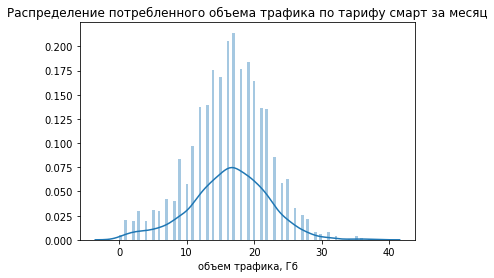

In [75]:
g_messages_traffic = sns.distplot( a=data_t[data_t['tariff'] == 'smart']['traffic'], hist=True, kde=True, bins = 100)
g_messages_traffic.set_xlabel('объем трафика, Гб')
g_messages_traffic.set_title('Распределение потребленного объема трафика по тарифу смарт за месяц');

В среднем клиенты тарифа ультра потребляют 17Гб трафика, что примечательно средняя и медиана расположены очень близко. Распределение объема потребленного трафика за месяц соответвует нормальному.

Меньше 50% клиентов тарифа смарт укладываются во включенный тарифом объем интернет-трафика (15Гб). У 25% объем потребленного трафика за месяц больше 20 Гб.

In [76]:
data_t[data_t['tariff'] == 'ultra']['traffic'].describe()

count    957.000000
mean      19.365726
std        9.978743
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: traffic, dtype: float64

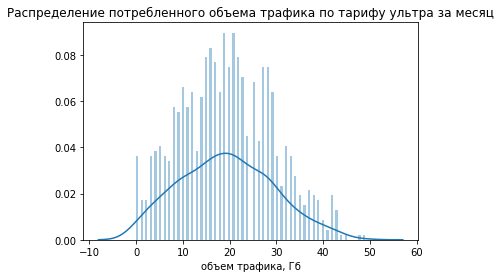

In [77]:
g_messages_traffic = sns.distplot( a=data_t[data_t['tariff'] == 'ultra']['traffic'], hist=True, kde=True, bins = 100)
g_messages_traffic.set_xlabel('объем трафика, Гб')
g_messages_traffic.set_title('Распределение потребленного объема трафика по тарифу ультра за месяц');

В среднем клиенты тарифа ультра потребляют 19Гб трафика, что примечательно средняя и медиана расположены очень близко. Распределение объема потребленного трафика клиентами тарифа ультраф соответвует нормальному.
Больше 75% клиентов укладываются во включенный в тариф объем трафика (30 Гб). 

**Вывод**
В среднем клиенты тарифов смарт и ультра потребляют сходное количество трафика в месяц 17Гб  и 19Гб соответственно. 
При этом большинство клиентов тарифа смарт используют дополнительный трафик, тогда как большинство клиентов тарифа ультра укладываются в выделенный тарифным планом объем трафика.

### вывод по поведению клиентов разных тарифов.

Клиенты тарифа смарт чаще клиентов тарифа ультра используют услуги сверхтарифного плана, для большинства из них это нормальное явление.
Тогда как большинство клиентов тарифа ультра пользуется включенными в тариф услугами.

На первый взгляд средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, но данную гипотезу нужно будет проверить при помощи статистических методов.

## Проверка гипотезы "средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются". <a id='Hypothesis_testing_1'></a>

Напишем функцию для удаления выбросов:

In [78]:
def delete_outliers(df, column, graphic=0, x = 10, y = 10):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return df.loc[iqr_test].boxplot([column], figsize=(x,y))
    else:
        return df.loc[iqr_test]

Для проверки гипотезы о различии средней выручки у клиентов тарифов Ультра и Смарт будем использовать t-критерий Стьюдента для двух независимых выборок с помощью метода  scipy.stats.ttest_ind().

**Сформулируем гипотезы:**

- H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна
- H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [79]:
ultra = data_t[data_t['tariff'] == 'ultra']
smart = data_t[data_t['tariff'] == 'smart']

In [80]:
smart = delete_outliers(smart, 'total_paid', 0)
smart = smart['total_paid']

In [81]:
ultra = delete_outliers(ultra, 'total_paid', 0)
ultra = ultra['total_paid']

In [82]:
alpha = 0.05
results = st.ttest_ind(ultra, smart)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


**Вывод** 

Разница между средними выборок не случайна, есть значимые различия средний значений между выручной от клиентов тарифа ульта и смарт (p<0,05)

## Проверка гипотезы "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов". <a id='Hypothesis_testing_2'></a>

В этом случае снова идет речь о сравнении средних двух независимых генеральных совокупностей. 

В качестве метода сравнения будем использовать критерий Стьюдента.

**Сформулируем гипотезы:**
- H0: средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов
- H1: средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов

Посмотрим из каких городов клиенты компании мегалайн.

In [83]:
data_t['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [84]:
len(data_t['city'].unique())

76

Клиенты компании мегалайн из 76 регионов россии, в том числе Москвы. Добавим в нашу таблицу колонку регион, где укажем "Москва" или провинция для всех отличных от Москвы регионов.

In [85]:
data_t['region'] = np.where(data_t['city'] == 'Москва', 'Москва', 'Провинция')

In [86]:
moscow = data_t[data_t['region'] == 'Москва']
province = data_t[data_t['region'] == 'Провинция']

Удалим выпадающие значения из массивов при помощи нашей функции.

In [87]:
moscow = delete_outliers(moscow, 'total_paid', 0)
moscow = moscow['total_paid']
province = delete_outliers(province, 'total_paid', 0)
province = province['total_paid']

In [88]:
results = st.ttest_ind(moscow, province)
print("p-значение:", results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2324185702354845
Не получилось отвергнуть нулевую гипотезу


**Вывод:**
Значимых отличий между средним доходом клиентов из Москвы и других регионов не обнаружено.

## Общий вывод. <a id='conclusion'></a>

Тариф ультра приносит больше денег для компании мегалайн (средняя выручка тарифа смарт 1000 руб, тогда как средняя выручка тарифа ультра 2000), различия между средней выручкой клиентов разных тарифов достоверны.

Клиенты компании мегалайн находятся в 76 регионах страны, при этом средняя доходность от клиентов из Москвы незначительно отличается от средней доходности от клиентов из других регионов.

Клиенты тарифа смарт чаще пользуются услугами сверх тарифного плана. 

В среднем общая длительность разговора у клиентов тарифов смарт и ультра составила 400 и 500 минут. При этом клиенты тарифа смарт достаточно часто пользовались сверхтарифными минутами, тогда как клиенты тарифа ультра не выговаривали и половину лимита.

СМС сообщения не пользуются особой популярностью среди клиентов тарифов, в среднем клиенты тарифов смарт и ультра отправляли по 30 и 40 сообщений в месяц. 75% клиентов тарифа смарт не пользовались услугой сверхлимитных смс, клиенты тарифа ультра использовали свой лимит на сообщения максимум на 20%. Вероятно такая низкая популярность смс связана с предпочтением клиентов пользоваться мессенджерами вместо смс сообщений.

В среднем клиенты тарифов смарт и ультра потребляют сходное количество трафика в месяц 17Гб и 19Гб соответственно. Больше 50% клиентов тарифа смарт пользуются сверхтарифным трафиком. Тольк в потреблении интернет-трафика клиенты тарифа ультра пользовались сверхтарифными услугами и третий квартиль распределения потребленного трафика лежит около выделенного в условиях тарифа объема. Таким образом можно предположить что услуга мобильного интернета является наиболее востребованной для клиентов мегалайн.

